# Feature clustering

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
X = pd.read_csv(
    './../../../data_source/to_analysis/no_filter_concat.csv',
    index_col=0
)
dfs = pd.read_csv(
    './../../../data_source/to_analysis/target_dfs.csv', index_col=0
)
lrr = pd.read_csv(
    './../../../data_source/to_analysis/target_lrr.csv', index_col=0
)
X.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxis,original_shape_MajorAxis,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxis,original_shape_Sphericity,...,PET_original_gldm_SmallDependenceHighGrayLevelEmphasis.2,PET_original_gldm_SmallDependenceLowGrayLevelEmphasis.2,PET_original_ngtdm_Busyness.2,PET_original_ngtdm_Coarseness.2,PET_original_ngtdm_Complexity.2,PET_original_ngtdm_Contrast.2,PET_original_ngtdm_Strength.2,SUVpeak,MTV,TLG
patient,,,,,,,,,,,,,,,,,,,,,
2,0.738882,0.723925,27.060529,37.380273,41.976184,44.598206,42.720019,45.617979,27.619612,0.661532,...,43.463833,0.000628,1.154403,0.000825,269.014757,0.118665,1.541690,21.616549,7.384,124.870726
4,0.796900,0.629917,19.845151,31.504408,38.587563,35.468296,29.410882,38.704005,25.105855,0.701721,...,51.943196,0.000634,0.685552,0.001717,312.311426,0.146972,2.658648,15.296275,3.406,41.554406
5,0.600926,0.535140,22.515072,42.073251,46.065171,43.011626,32.015621,46.454279,25.282894,0.762365,...,44.989181,0.000535,0.956497,0.000878,260.071046,0.100053,1.755065,14.473272,7.934,86.228420
8,0.784571,0.414247,30.263897,73.057649,74.148500,80.956779,65.764732,83.438600,57.318945,0.520001,...,40.436803,0.000370,2.913565,0.000506,239.436835,0.096156,0.432808,10.510859,26.926,205.413389
10,0.690320,0.539743,19.449801,36.035312,33.286634,38.013156,33.015148,43.150898,24.875896,0.643822,...,49.151806,0.000605,0.521241,0.002781,290.056759,0.095754,1.835505,7.213190,6.041,32.103770


In [5]:
X -= X.mean(axis=0)
X /= X.std(axis=0)
X.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxis,original_shape_MajorAxis,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxis,original_shape_Sphericity,...,PET_original_gldm_SmallDependenceHighGrayLevelEmphasis.2,PET_original_gldm_SmallDependenceLowGrayLevelEmphasis.2,PET_original_ngtdm_Busyness.2,PET_original_ngtdm_Coarseness.2,PET_original_ngtdm_Complexity.2,PET_original_ngtdm_Contrast.2,PET_original_ngtdm_Strength.2,SUVpeak,MTV,TLG
patient,,,,,,,,,,,,,,,,,,,,,
2,0.298844,1.674005,0.458751,-0.432048,-0.299894,-0.073207,0.279298,-0.291591,-0.224834,-0.081711,...,-0.182284,-0.139421,-0.188625,-0.395653,-0.099123,0.779202,-0.282504,2.054811,-0.328831,0.074316
4,0.692748,0.912154,-0.292368,-0.795698,-0.479030,-0.587462,-0.540444,-0.647093,-0.440780,0.414013,...,0.269591,-0.128510,-0.533740,-0.154715,0.359762,1.670733,0.316957,0.850650,-0.654498,-0.413240
5,-0.637794,0.144078,-0.014430,-0.141604,-0.083734,-0.162573,-0.380012,-0.248591,-0.425572,1.162043,...,-0.100996,-0.312111,-0.334301,-0.381436,-0.193914,0.193023,-0.167987,0.693848,-0.283804,-0.151814
8,0.609046,-0.835645,0.792221,1.775986,1.400863,1.974741,1.698678,1.653065,2.326511,-1.827454,...,-0.343598,-0.619763,1.106271,-0.481911,-0.412608,0.070288,-0.877630,-0.061085,1.271017,0.545640
10,-0.030862,0.181381,-0.333524,-0.515286,-0.759259,-0.444119,-0.318449,-0.418443,-0.460535,-0.300152,...,0.120835,-0.181631,-0.654688,0.132441,0.123894,0.057631,-0.124816,-0.689369,-0.438779,-0.468544


## Affinity propagation clustering algorithm

In [6]:
from sklearn import metrics
from sklearn.cluster import AffinityPropagation

Estimated number of clusters: 24
Homogeneity: 0.129
Completeness: 0.031
V-measure: 0.050
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.005


/Users/severinlangberg/anaconda/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Text(0.5, 1.0, 'Estimated number of clusters: 24')

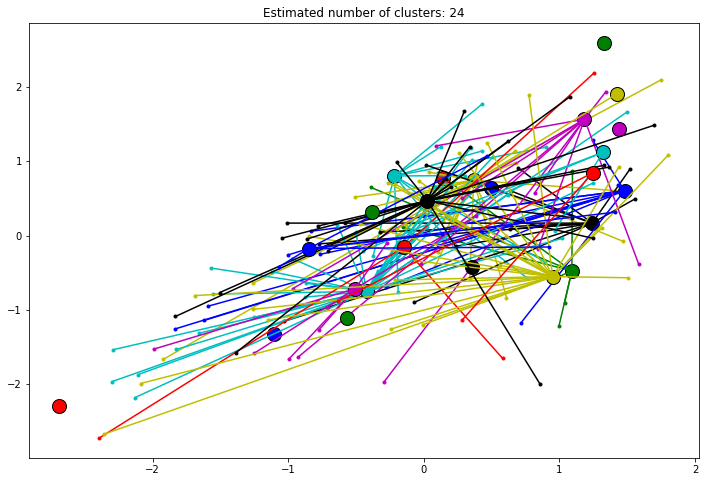

In [7]:
labels_true = np.squeeze(dfs.values)
#labels_true = np.squeeze(lrr.values)

# Compute Affinity Propagation
af = AffinityPropagation().fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

from itertools import cycle

plt.close('all')
plt.figure(figsize=(12, 8))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X.values[cluster_centers_indices[k]]
    plt.plot(X.values[class_members, 0], X.values[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X.values[class_members, :]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)

## Agglomerative Clustering

In [8]:
from time import time

from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering

# Good clustering = separate numbers in each color group.

Computing embedding
Done.
ward :	0.08s
average :	0.00s
complete :	0.00s
single :	0.00s


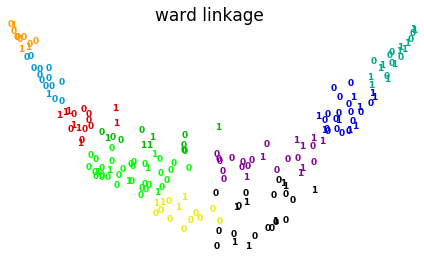

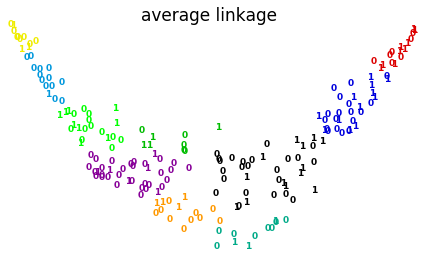

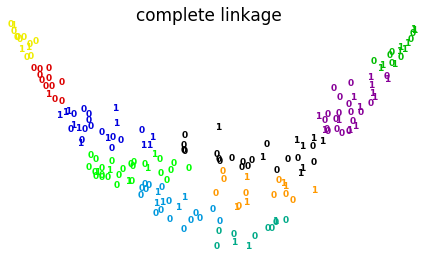

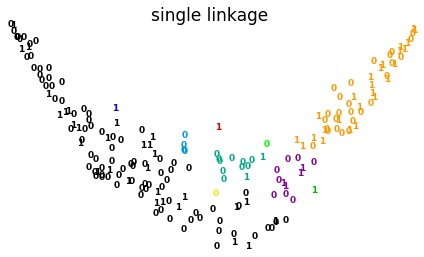

In [9]:
y = np.squeeze(dfs.values)
#y = np.squeeze(lrr.values)


def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    

print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

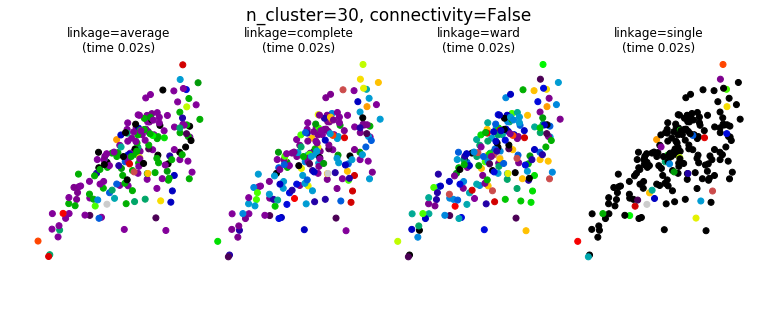

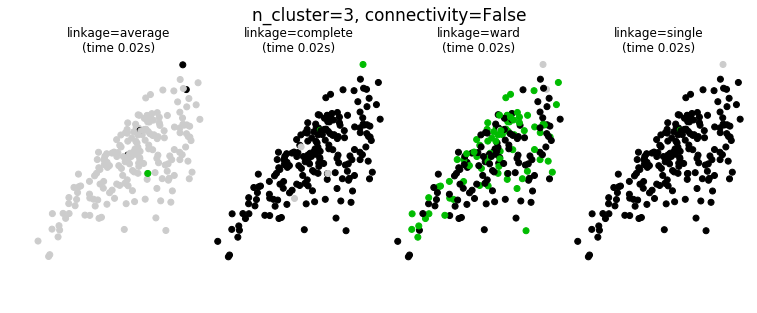

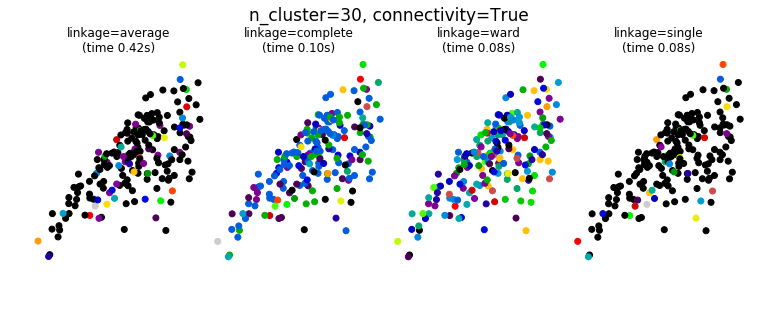

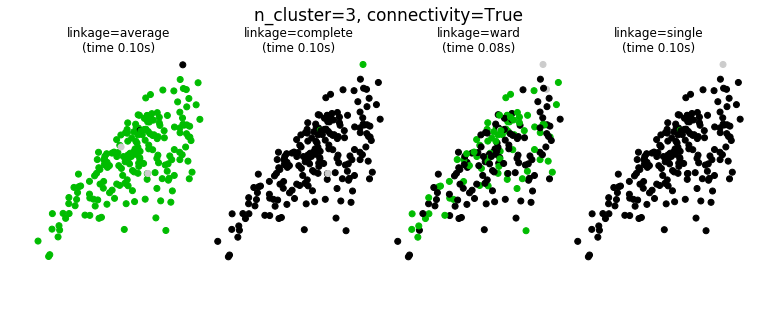

In [11]:
# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time()
            model.fit(X)
            elapsed_time = time() - t0
            plt.scatter(X.values[:, 0], X.values[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)

## DBSCAN

In [12]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

Estimated number of clusters: 0
Estimated number of noise points: 198
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


/Users/severinlangberg/anaconda/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Text(0.5, 1.0, 'Estimated number of clusters: 0')

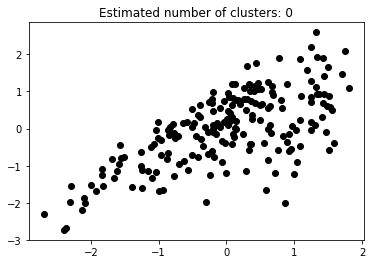

In [13]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X.values[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X.values[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)